# SAYT SOMETHING HERE
Looking at the occupation of Legal Professions: Lawyers, Juges, Magistrates, and other judicial positions (occ2012 = 2100)

https://osf.io/uqe8z = shows what variables mean

### Importing Libraries

In [155]:
import pandas as pd
import numpy as np
import warnings
from plotnine import *
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
warnings.filterwarnings("ignore")

### Reading Data & Exploratory Data Analysis

In [156]:
#reading file. morg2014.csv was too large- had to turn into zip file
file = pd.read_csv('ezyzip.zip')

In [157]:
#see data
file.shape

(317056, 96)

In [158]:
#Legal Professions like lawyers, judges, magistrates, and other judicial positions
#at start: 1,666 observations
law = file.loc[file['occ2012'] == 2100].reset_index(drop=True)
law.head()

,hhid,intmonth,hurespli,minsamp,hrlonglk,hrsample,hrhhid2,serial,hhnum,state,...,ym_file,ym,ch02,ch35,ch613,ch1417,ch05,ihigrdc,docc00,dind02
0,960021970039060,January,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,63,...,648,633,0,0,0,0,0,18.0,Legal occupations,Professional and Technical services
1,235004820400137,January,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,86,...,648,633,0,0,0,0,0,18.0,Legal occupations,Public Administration
2,985879730586005,January,3.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,71,...,648,633,0,0,0,1,0,18.0,Legal occupations,Professional and Technical services
3,94927107035608,January,2.0,MIS 4,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,93,...,648,645,0,0,1,0,0,18.0,Legal occupations,Professional and Technical services
4,97977400095618,January,1.0,MIS 4,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,93,...,648,645,0,0,0,1,0,18.0,Legal occupations,Professional and Technical services


In [173]:
#creation of outcome variable (y)
law['earnperhr'] = law['earnwke']/law['uhourse']
law['earnperhr'][:5]

0    28.846000
1    34.615250
2    45.966381
3    45.966381
4    46.140000
Name: earnperhr, dtype: float64

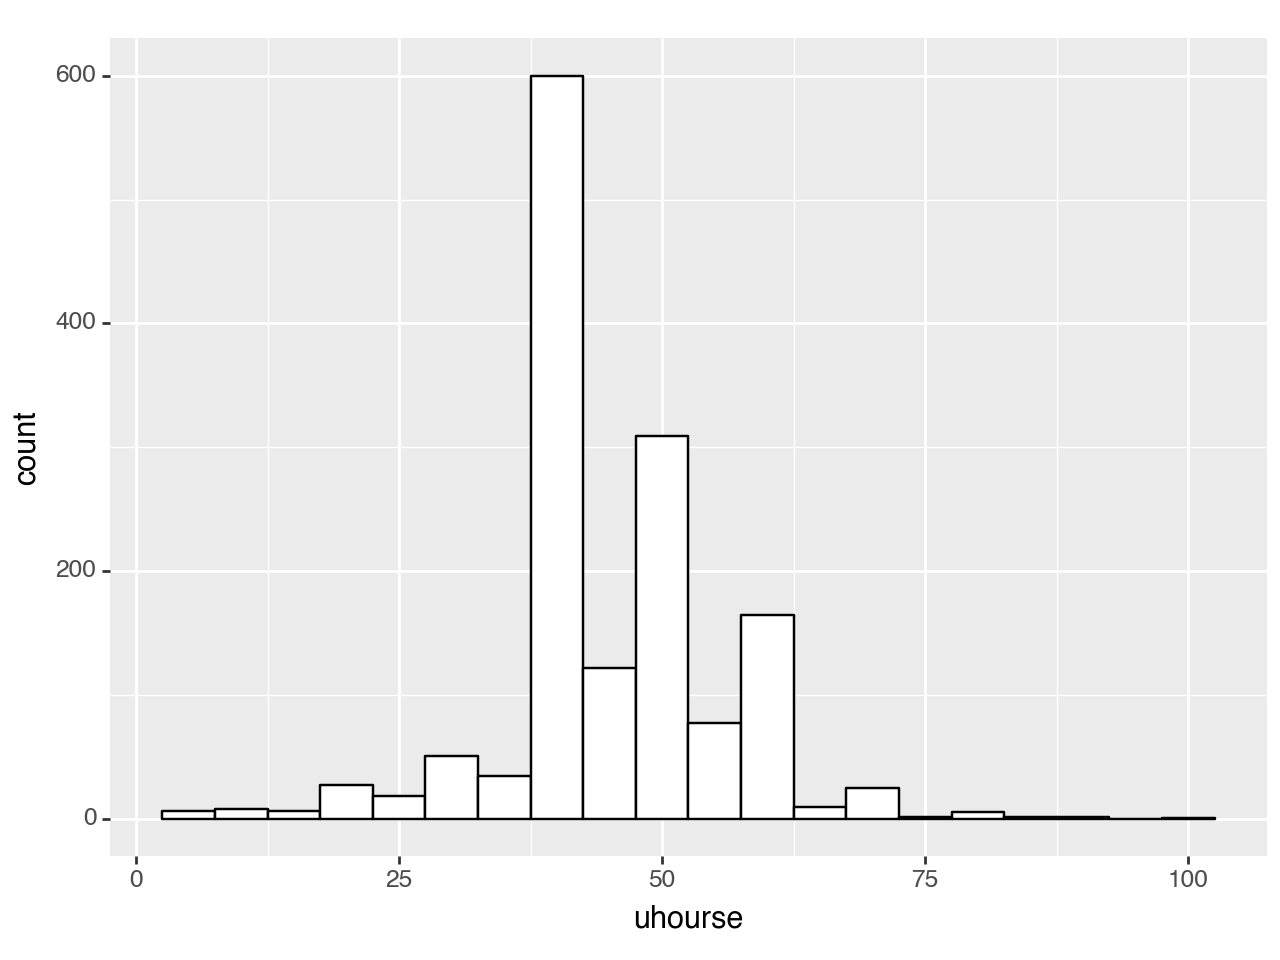

<Figure Size: (640 x 480)>

In [160]:
#checking distribution of 'uhourse' to see if imputation using median or mean is better. not normally distributed,
#therefore, will use median to impute
(ggplot(law, aes(x='uhourse')) +
    geom_histogram(binwidth= 5, colour="black", fill="white"))

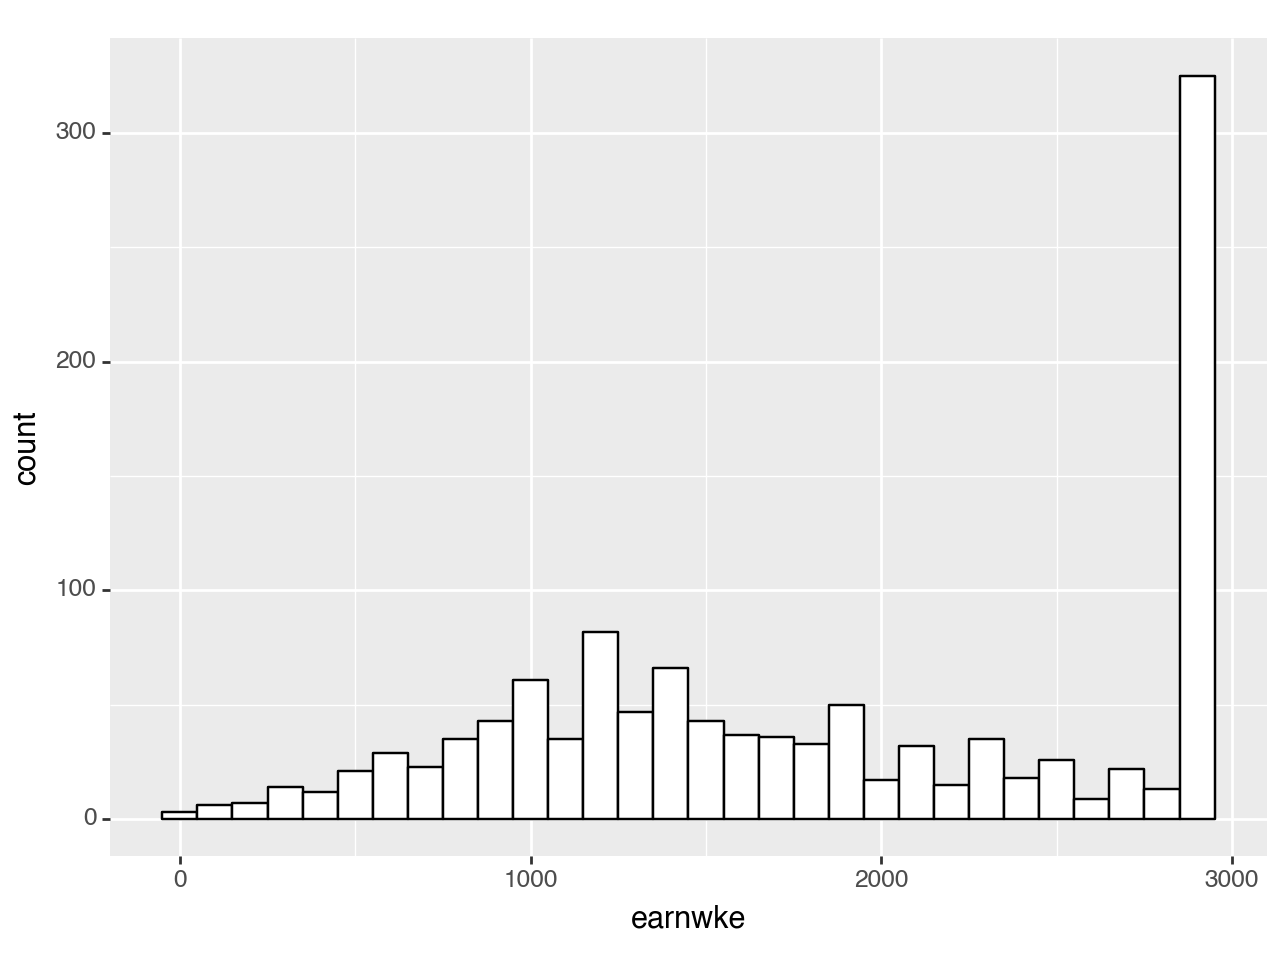

<Figure Size: (640 x 480)>

In [161]:
#checking distribution of 'earnwke' to see if imputation using median or mean is better. 
(ggplot(law, aes(x='earnwke')) +
    geom_histogram(binwidth= 100, colour="black", fill="white"))

In [162]:
print(f'law.earnwke mean:{law.earnwke.mean()}')
print(f'law.earnwke median:{law.earnwke.median()}')
#As these 2 values are close together, I am opting for the mean value due to over 300 observations falling in the
#final bin

law.earnwke mean:1838.655238493724
law.earnwke median:1730.76


In [163]:
#checking for null values:

#age: no missing values
law.age.isnull().value_counts()

#sex: no missing values
law.sex.isnull().value_counts()

#uhourse: 189 null. using median to impute
uhourse_median_value = law.uhourse.median()
law.uhourse.fillna(value=uhourse_median_value, inplace = True)
law.uhourse.isnull().value_counts()
#no missing values anymore

#grade92: no missing values
law.grade92.isnull().value_counts()

#earnwke: 471 null. using mean to impute
earnwke_mean_value = law.earnwke.mean()
law.earnwke.fillna(value=earnwke_mean_value, inplace = True)
law.earnwke.isnull().value_counts()
#no missing values anymore

#state: no missing values
law.state.isnull().value_counts()
#USING DIVISIONS instead

#race: no missing values
law.race.isnull().value_counts()

#prcitshp: no missing values
law.prcitshp.isnull().value_counts()
#USING dummy variable instead of str

#marital: no missing values
law.marital.isnull().value_counts()
#USING married and single dummy variables

#ownchild: no missing values
law.ownchild.isnull().value_counts()


ownchild
False    1666
Name: count, dtype: int64

In [164]:
#fixing state variable (some were int and some were str), making into divisions
print(law.state.unique())

#NE Division
law.state.replace('MA', 11, inplace = True)
law.state.replace('NH', 12, inplace = True)
law.state.replace('VT', 13, inplace = True)
law.state.replace('MA', 14, inplace = True)
law.state.replace('RI', 15, inplace = True)
law.state.replace('CT', 16, inplace = True)
#Middle Atlantic Division
law.state.replace('NY', 21, inplace = True)
law.state.replace('NJ', 22, inplace = True)
law.state.replace('PA', 23, inplace = True)
#East North Central Division
law.state.replace('OH', 31, inplace = True)
law.state.replace('IN', 32, inplace = True)
law.state.replace('IL', 33, inplace = True)
law.state.replace('MI', 34, inplace = True)
law.state.replace('WI', 35, inplace = True)
#West North Central Division
law.state.replace('MN', 41, inplace = True)
law.state.replace('IA', 42, inplace = True)
law.state.replace('MO', 43, inplace = True)
law.state.replace('ND', 44, inplace = True)
law.state.replace('SD', 45, inplace = True)
law.state.replace('46', 46, inplace = True)
law.state.replace('47', 47, inplace = True)
#South Atlantic Division
law.state.replace('51', 51, inplace = True)
law.state.replace('52', 52, inplace = True)
law.state.replace('53', 53, inplace = True)
law.state.replace('54', 54, inplace = True)
law.state.replace('55', 55, inplace = True)
law.state.replace('56', 56, inplace = True)
law.state.replace('57', 57, inplace = True)
law.state.replace('58', 58, inplace = True)
law.state.replace('59', 59, inplace = True)
#East South Central Division
law.state.replace('61', 61, inplace = True)
law.state.replace('62', 62, inplace = True)
law.state.replace('63', 63, inplace = True)
law.state.replace('64', 64, inplace = True)
#West South Central Division
law.state.replace('71', 71, inplace = True)
law.state.replace('72', 72, inplace = True)
law.state.replace('73', 73, inplace = True)
law.state.replace('74', 74, inplace = True)
#Mountain Division
law.state.replace('81', 81, inplace = True)
law.state.replace('82', 82, inplace = True)
law.state.replace('83', 83, inplace = True)
law.state.replace('84', 84, inplace = True)
law.state.replace('85', 85, inplace = True)
law.state.replace('86', 86, inplace = True)
law.state.replace('87', 87, inplace = True)
law.state.replace('88', 88, inplace = True)
#Pacific Division
law.state.replace('91', 91, inplace = True)
law.state.replace('92', 92, inplace = True)
law.state.replace('93', 93, inplace = True)
law.state.replace('94', 94, inplace = True)
law.state.replace('95', 95, inplace = True)
#left over state numbers
#putting all numbers 1-9 into their divisions (1st number is the division they are in)
#doesn't matter what the state is because the categories will be their divisions
law.state.replace('7', 71, inplace = True)
law.state.replace('9', 91, inplace = True)
law.state.replace(1, 11, inplace = True)
law.state.replace(2, 21, inplace = True)
law.state.replace(3, 31, inplace = True)
law.state.replace(4, 41, inplace = True)
law.state.replace(5, 51, inplace = True)
law.state.replace(6, 61, inplace = True)
law.state.replace(7, 71, inplace = True)
law.state.replace(8, 81, inplace = True)
law.state.replace(9, 91, inplace = True)

#creating categories for state divisions (dummy variables)    
law['NE_Division'] = law['state'].isin([11,12,13,14,15,16]).astype(int)
law['Middle_Atlantic_Division'] = law['state'].isin([21,22,23]).astype(int)
law['East_North_Central_Division'] = law['state'].isin([31,32,33,34,35]).astype(int)
law['West_North_Central_Division'] = law['state'].isin([41,42,43,44,45,46,47]).astype(int)
law['South_Atlantic_Division'] = law['state'].isin([51,52,53,54,55,56,57,58,59]).astype(int)
law['East_South_Central_Division'] = law['state'].isin([61,62,63,64]).astype(int)
law['West_South_Central_Division'] = law['state'].isin([71,72,73,74]).astype(int)
law['Mountain_Division'] = law['state'].isin([81,82,83,84,85,86,87,88]).astype(int)
law['Pacific_Division'] = law['state'].isin([91,92,93,94,95]).astype(int)

['63' '86' '71' '93' '84' 'CT' '53' '59' '58' '82' 'IL' 'IN' '47' '61'
 '72' '52' 'MA' 'MI' 'MN' '64' '46' '88' 'NJ' '85' 'NY' '56' 'ND' 'OH'
 '92' 'PA' 'RI' '57' '62' '74' 'VT' '54' '91' 'WI' '94' '51' '95' 'IA'
 'MO' 'NH' 'SD' '87' '55' '81' '73' '83' '7' '9' 9 8 1 5 3 4 6 7 2]


In [165]:
#fixing marital variable
law['married'] = law['marital'].isin([1,2,3]).astype(int)
law['single'] = law['marital'].isin([4,5,6,7]).astype(int)

In [166]:
#creating dummy variable for sex (female)
law['female'] = (law["sex"] == 2).astype(int)

In [167]:
#creating dummy variable for grade92
law['grade92'].min() #33, 5th-6th grade (middle school)
law['grade92'].max() #46, doctorate degree
law['grade92'].mean() #about 45, professional school degree (includes JD)
law.loc[law['grade92'] < 45] #only 185 observations with grade92 less than 45
law['ed_low'] = (law['grade92']< 45).astype(int) #less than professional degree (includes bachelors and masters)
law['ed_high'] = (law['grade92']>=45).astype(int) #equal to or higher than professional degree (includes professional degree and doctorate)

In [168]:
#fixing prcitshp variable to be dummy instead of str
law.prcitshp.replace('Native, Born In US', 1, inplace = True)
law.prcitshp.replace('Foreign Born, US Cit By Naturalization', 1, inplace = True)
law.prcitshp.replace('Foreign Born, Not a US Citizen', 0, inplace = True)
law.prcitshp.replace('Native, Born Abroad Of US Parent(s)', 1, inplace = True)
law.prcitshp.replace('Native, Born in PR or US Outlying Area', 1, inplace = True)

In [169]:
###CORINNEE!!! make legends for some of these variables (example: race is integers...give 
#the legend of what that means!!!) = turn into markdown
#age = age of employee in years
#sex = 1 if male, 2 if female
#uhourse = usual hours worked per week
#grade92 = education level (ints 31-46 representing Kindergarten-doctorate degree)
#earnwke = weekly earnings in USD
#state = in which state the employee resides
#race = 1:White, 2:Black, 3:American Indian, 4:Asian or Pacific Islander, 5:Other, 6:Mixed(White/Black), 7:Mixed(White/American Indian), 8:Mixed(White/Asian), 10:Mixed(Black/American Indian), 11:Mixed(Black/Asian)
#prcitshp = 1 if American citizen, 0 if non-American citizen
#marital = 1-3 if married, 4-7 if currently single
#ownchild = number of children employee has in primary family


In [170]:
###CORINNE'S PLAN
# y = earnings per hour ('earnperhr')
    #this means... earnwke (weekly earnings)/uhourse
# x = age(int), sex(int), uhourse (usual work hours)(int), grade92 (highest educational grade completed)(int)
# Model 1: age, sex(female dummy)
# Model 2: age, sex(female dummy), uhourse, grade92/ed_low/high
# Model 3: age, sex(female dummy), uhourse, grade92/ed_low/high, state division, race, prcitshp,
# Model 4: age, sex(female dummy), uhourse, grade92/ed_low/high, state division, race, prcitshp, marital, ownchild

#could do 'state' as a variable, but would have to create dummy variables... (str)
#could do 'race' as a variable, but would have to create dummy variables... (int)
#could do 'prcitshp' (citizenship status) as a variable, but would have to create dummy variable...(str)
#could do 'marital' as variable...dummy variables would be 1,2,3 = 'married', 4,5,6,7 = 'single'(int)
#could do 'ownchild' as variable = shows number of children less than 18 in the primary family(int)

#deleting ethnic category because only 68/1,666 were not null!

In [179]:
reg1 = smf.ols(formula="earnperhr~age+ female", data=law).fit(cov_type="HC1")
#Male is the reference category for female
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:              earnperhr   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     11.89
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           7.43e-06
Time:                        15:22:53   Log-Likelihood:                -7942.7
No. Observations:                1666   AIC:                         1.589e+04
Df Residuals:                    1663   BIC:                         1.591e+04
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.1102      2.421     12.849      0.0

In [180]:
reg1.bic

15907.66171070826

In [184]:
reg2 = smf.ols(formula="earnperhr~age+ female+uhourse+ed_high", data=law).fit(cov_type="HC1")
#Male is the reference category for female, ed_low is the reference category for ed_high
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:              earnperhr   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     15.34
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           2.50e-12
Time:                        15:26:03   Log-Likelihood:                -7818.0
No. Observations:                1666   AIC:                         1.565e+04
Df Residuals:                    1661   BIC:                         1.567e+04
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.8822      7.891      8.983      0.0

In [190]:
reg2.bic

15673.03961180528

In [193]:
reg3 = smf.ols(formula='''earnperhr~age+ female+uhourse+ed_high+NE_Division+Middle_Atlantic_Division+ 
                East_North_Central_Division+West_North_Central_Division+South_Atlantic_Division+
                East_South_Central_Division+West_South_Central_Division+
                Mountain_Division''', data=law).fit(cov_type="HC1")
#Male is the reference category for female, ed_low is the reference category for ed_high
#Pacific
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:              earnperhr   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     15.34
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           2.50e-12
Time:                        15:33:09   Log-Likelihood:                -7818.0
No. Observations:                1666   AIC:                         1.565e+04
Df Residuals:                    1661   BIC:                         1.567e+04
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.8822      7.891      8.983      0.0